In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('./daily_max_rainfall.csv')
year_and_month = df['date'].str.split('-', 2, expand=True)
df['month'] = year_and_month[1].astype(int)
df.head()

,Unnamed: 0,date,rain,time,month
0,133,2020-08-01,88.0,5-0,8
1,236,2020-10-12,82.0,8-10,10
2,0,2020-07-27,80.0,12-20,7
3,26,2020-07-12,76.5,22-0,7
4,41,2020-09-14,76.0,6-0,9


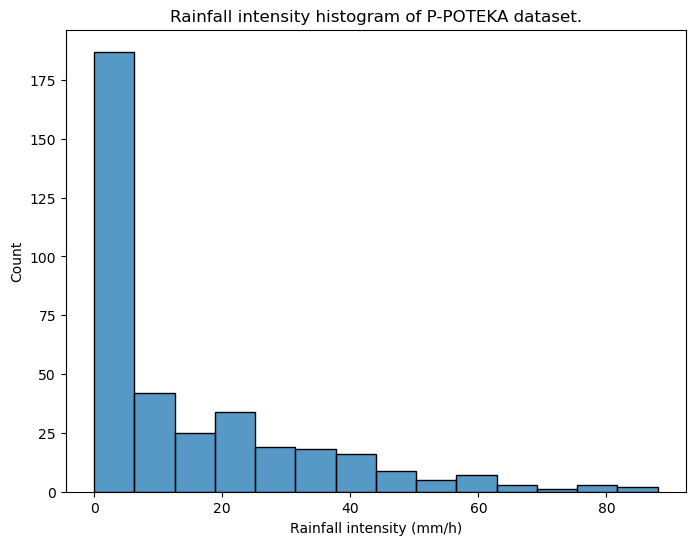

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x='rain', ax=ax)
ax.set_title('Rainfall intensity histogram of P-POTEKA dataset.')
ax.set_xlabel('Rainfall intensity (mm/h)')
fig.savefig('rainfall-instensity-histogram.png')

In [1]:
import pandas as pd
import sys

sys.path.append("../..")
from common.utils import timestep_csv_names

In [2]:
import os
root_dir = "../../../data/one_day_data/"
assert os.path.exists(root_dir)

In [3]:
_timestep_csv_names = timestep_csv_names(delta=10)

dates, rain_amounts, start_times = [], [], []
for year in os.listdir(root_dir):
    for month in os.listdir(root_dir + f"/{year}"):
        for date in os.listdir(root_dir + f"/{year}/{month}"):
            max_rainfall = 0
            minimum_data_length = 40
            start_time = "0-0"
            for csv_filename in _timestep_csv_names:
                csv_path = os.path.join(
                        root_dir,
                        year, month, date, csv_filename
                    )
                parquet_path = csv_path.replace(".csv", ".parquet.gzip")
                parquet_df = pd.read_parquet(parquet_path, engine="pyarrow")

                if parquet_df["AT1"].max() > max_rainfall:
                    max_rainfall = parquet_df["hour-rain"].max()
                    start_time = csv_filename.replace(".csv", "")

                if len(parquet_df.index) < minimum_data_length:
                    minimum_data_length = len(parquet_df.index)

            if minimum_data_length > 0:
                dates.append(date)
                rain_amounts.append(max_rainfall)
                start_times.append(start_time)

df = pd.DataFrame({"date": dates, "rain": rain_amounts, "time": start_times})
df = df.sort_values(by="rain", ascending=False)
df.reset_index()
df.head()

,date,rain,time
232,2020-07-12,45.0,21-30
145,2020-05-25,42.0,19-20
240,2020-07-26,42.0,9-50
251,2020-09-23,41.5,9-30
244,2020-07-27,40.5,11-30


In [4]:
df.to_csv("daily_max_rainfall.csv")